# Investigation of the Ford GoBike system
## by Wagdy El-Sherbiny

## Investigation Overview

> The goal of this investigation is to analyze and understan the various features that effect trip duration, and what are the relation between main attributes such as trip duration, user type and memeber gender. 

## Dataset Overview

> The Ford GoBike System dataset contains information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are arounf 183412 records in the datset with main attributes that describe rides such as start station, end station and duration.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('df_clean.csv')

## Distribution of Trip Duration


> The ride duration in the dataset take on a very large range of values, from about 1 minute 𝑎𝑡 𝑡ℎ𝑒 𝑙𝑜𝑤𝑒𝑠𝑡,𝑡𝑜 𝑎𝑏𝑜𝑢𝑡 300 minutes at the highest. Plotted on a logarithmic scale, the distribution takes on an unimodal shape.

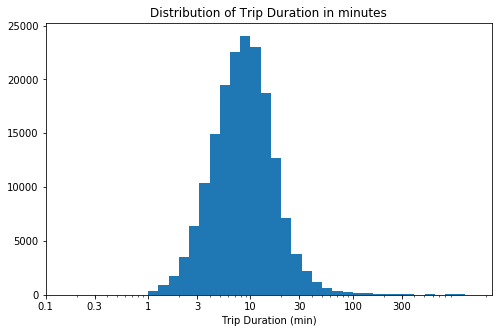

In [3]:
plt.figure(figsize=[8, 5])
log_binsize=.1
bin_lst= 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
plt.hist(data= df, x='duration_min', bins=bin_lst);
#plt.xlim(0, 1500);
plt.xscale('log');
xtick=[ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
plt.xticks(xtick, xtick);
plt.xlabel('Trip Duration (min)')
plt.title('Distribution of Trip Duration in minutes');

## Percentage of Member Gender

> The pie chart describes the percentage of the riders genders. its obvious that Male riders around 75% while Female around 23%.

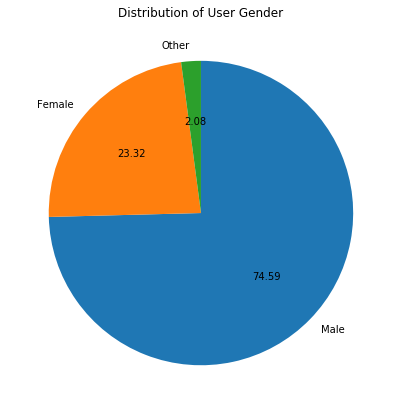

In [4]:
# Plot a pie chart to show percentages of member gender
ride_geneder= df.member_gender.value_counts()
plt.figure(figsize=[7, 7])
plt.pie(ride_geneder, labels=ride_geneder.index, startangle=90, counterclock=False, autopct='%.2f');
plt.title('Distribution of User Gender');

## Distribution of User Types


> There are two user type, first one is Subscriber which represents almost 90% of the data , and second type is Customer with 10%.

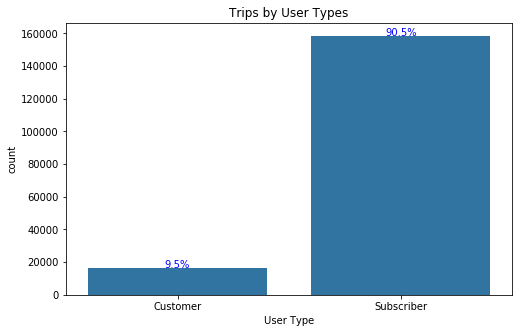

In [8]:
# plot distribution of user type
plt.figure(figsize=[8, 5])
color_def= sn.color_palette()[0]
sn.countplot(data=df, x='user_type', color=color_def);

n_points = df.shape[0]
user_counts = df['user_type'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')


plt.title('Trips by User Types')
plt.xlabel('User Type');

## Distribution of the duration over user type and age

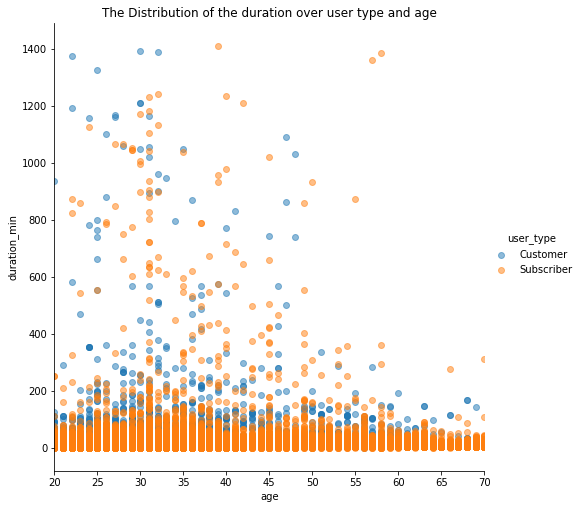

In [10]:
g = sn.FacetGrid(data = df, hue = 'user_type', height = 7)
g.map(plt.scatter, 'age', 'duration_min',alpha=.5)
g.add_legend();
plt.xlim(20,70);
xtick=[ 20 , 25 , 30, 35, 40, 45, 50, 55, 60, 65, 70]
plt.xticks(xtick, xtick);
plt.title('The Distribution of the duration over user type and age');

## Distribution of the duration over user type and member gender

> The chart shows that the average of trip duration for users of customer types is greater than subscribed user.
Also the difference between Female and Male lighlty small.

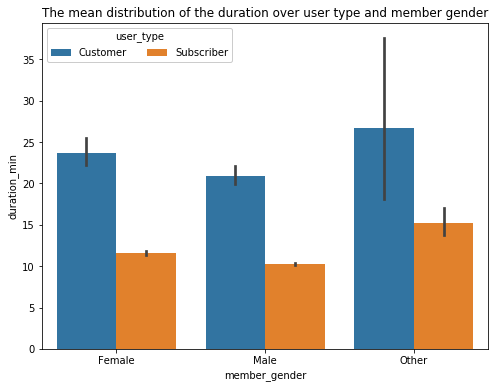

In [11]:
plt.figure(figsize = [8,6])
ax = sn.barplot(data = df, x = 'member_gender', y = 'duration_min', hue = 'user_type',order=["Female", "Male","Other"])
ax.legend(loc = 0, ncol = 3, framealpha = 1, title = 'user_type');
plt.title('The mean distribution of the duration over user type and member gender');